---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Distributions in Pandas

In [2]:
import pandas as pd
import numpy as np

In [3]:
np.random.binomial(1, 0.5)

1

In [4]:
np.random.binomial(1000, 0.5)/1000

0.496

In [5]:
chance_of_tornado = 0.01/100
np.random.binomial(100000, chance_of_tornado)

11

#### Chances of hitting tornado consectively two days in a row

In [6]:
#Let's say the chance of a tornado here in Ann Arbor on any given day, is 1% regardless of the time of year.
chance_of_tornado = 0.01

# we will do the simulation 1 million times. This way of simulation is known as sampling the distribution
tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)

# Loop to check two consective days
two_days_in_a_row = 0
for j in range(1, len(tornado_events) - 1):
    if tornado_events[j] == 1 and tornado_events[j - 1] == 1:
        two_days_in_a_row += 1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

104 tornadoes back to back in 2739.72602739726 years


In [7]:
np.random.uniform(0, 1)

0.3385471786745896

In [8]:
np.random.normal(0.75)

2.3231734938114554

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

Let's draw 1,000 samples from a normal distribution with an expected value of 0.75 and a standard deviation of 1

In [9]:
distribution = np.random.normal(0.75,size=1000)

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

0.9978384595538508

NumPy has a built-in function for calculating `standard deviation` called STD

In [10]:
np.std(distribution)

0.9978384595538508

In [23]:
%%timeit
np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

33.2 µs ± 890 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [24]:
%%timeit
np.std(distribution)

40.1 µs ± 736 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


There's a couple more measures of distribution that are interesting to talk about. One of these is the shape of the tales of the distribution and this is called the `kurtosis`.

A negative value means the curve is slightly more flat than a normal distribution, and a positive value means the curve is slightly more peaky than a normal distribution. Remember that we aren't measuring the kurtosis of the distribution per se, but of the thousand values which we sampled out of the distribution. This is a sublet but important distinction.

In [11]:
import scipy.stats as stats
stats.kurtosis(distribution)

0.2724192296497612

We could also move out of the normal distributions and push the peak of the curve one way or the other. And this is called the skew.

In [12]:
stats.skew(distribution)

0.07188203165452135

In [13]:
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

1.9116020876184447

In [14]:
chi_squared_df5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df5)

1.2981943871212736

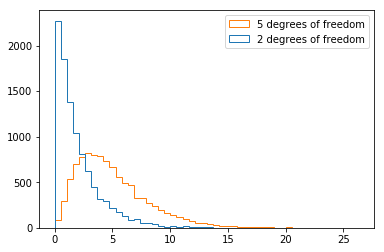

In [15]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')


# Hypothesis Testing

In [16]:
df = pd.read_csv('grades.csv')

FileNotFoundError: File b'grades.csv' does not exist

In [ ]:
df.head()

In [ ]:
len(df)

In [ ]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [ ]:
early.mean()

In [ ]:
late.mean()

In [ ]:
from scipy import stats
stats.ttest_ind?

In [ ]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

In [ ]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

In [ ]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

### Week 4 notes

Suppose we want to simulate the probability of flipping a fair coin 20 times, and getting a number greater than or equal to 15. Use np.random.binomial(n, p, size) to do 10000 simulations of flipping a fair coin 20 times, then see what proportion of the simulations are 15 or greater.

In [ ]:
x = np.random.binomial(20, .5, 10000)
print((x>=15).mean())